In [1]:
from optimization import optimize
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from oracle import Oracle, make_oracle
import seaborn as sns
from typing import List
from sklearn.linear_model import LogisticRegression

In [2]:
def optimize_sklearn(oracle):
    model = LogisticRegression(penalty="none", tol=1e-8, max_iter=10000, n_jobs=-1, fit_intercept=False)
    model.fit(oracle.X, oracle.Y.ravel())

    entropy_true = oracle.value(model.coef_.reshape(-1, 1))
    return entropy_true

In [3]:
def plot_vs_iter(data, true_ans: float, opt1: str, opt2: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data1 = data[(data["OptMethod"] == opt1) & (data["LineSearch"] == ls)]
        data2 = data[(data["OptMethod"] == opt2) & (data["LineSearch"] == ls)]
        ax[0].plot(data1.num_iter, np.log10(np.abs(data1.entropy - true_ans)), label=f"{opt1}: {ls}")
        ax[0].plot(data2.num_iter, np.log10(np.abs(data2.entropy - true_ans)), label=f"{opt2}: {ls}")
        ax[1].plot(data1.num_iter, np.log10(data1.rk), label=f"{opt1}: {ls}")
        ax[1].plot(data2.num_iter, np.log10(data2.rk), label=f"{opt2}: {ls}")

    plt.suptitle(title, y=1.05)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Iteration number")
    ax[1].set_xlabel("Iteration number")  # ???
    
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=5, bbox_to_anchor=(0.5, 1))
    plt.show()

def plot_vs_calls(data, true_ans: float, opt1: str, opt2: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data1 = data[(data["OptMethod"] == opt1) & (data["LineSearch"] == ls)]
        data2 = data[(data["OptMethod"] == opt2) & (data["LineSearch"] == ls)]
        ax[0].plot(data1.oracle_calls, np.log10(np.abs(data1.entropy - true_ans)), label=f"{opt1}: {ls}")
        ax[0].plot(data2.oracle_calls, np.log10(np.abs(data2.entropy - true_ans)), label=f"{opt2}: {ls}")
        ax[1].plot(data1.oracle_calls, np.log10(data1.rk), label=f"{opt1}: {ls}")
        ax[1].plot(data2.oracle_calls, np.log10(data2.rk), label=f"{opt2}: {ls}")

    plt.suptitle(title, y=1.05)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Oracle call number")
    ax[1].set_xlabel("Oracle call number")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=5, bbox_to_anchor=(0.5, 1))
    plt.show()


def plot_vs_time(data, true_ans: float, opt1: str, opt2: str, linesearch_methods: List[str], title: str = None):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for ls in linesearch_methods:
        data1 = data[(data["OptMethod"] == opt1) & (data["LineSearch"] == ls)]
        data2 = data[(data["OptMethod"] == opt2) & (data["LineSearch"] == ls)]
        ax[0].plot(data1.time, np.log10(np.abs(data1.entropy - true_ans)), label=f"{opt1}: {ls}")
        ax[0].plot(data2.time, np.log10(np.abs(data2.entropy - true_ans)), label=f"{opt2}: {ls}")
        ax[1].plot(data1.time, np.log10(data1.rk), label=f"{opt1}: {ls}")
        ax[1].plot(data2.time, np.log10(data2.rk), label=f"{opt2}: {ls}")

    plt.suptitle(title, y=1.05)
    ax[0].set_ylabel("$\log(|F(w*) - F(w_{true})|)$")
    ax[1].set_ylabel("$\log\\left(\\frac{|\Delta F(w_k)|}{|\Delta F(w_0)|}\\right)$")
    ax[0].set_xlabel("Time spent, s")
    ax[1].set_xlabel("Time spent, s")  # ???

    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=5, bbox_to_anchor=(0.5, 1))
    plt.show()


In [4]:
a1a = make_oracle("a1a.libsvm")
true_ans = optimize_sklearn(a1a)

In [5]:
sns.set()
sns.set_context("talk")
linesearch_methods = ["golden_section", "brent", "dbrent", "armijo", "wolfe"]

In [6]:
data = pd.read_csv("data/a1a_zeros.csv")

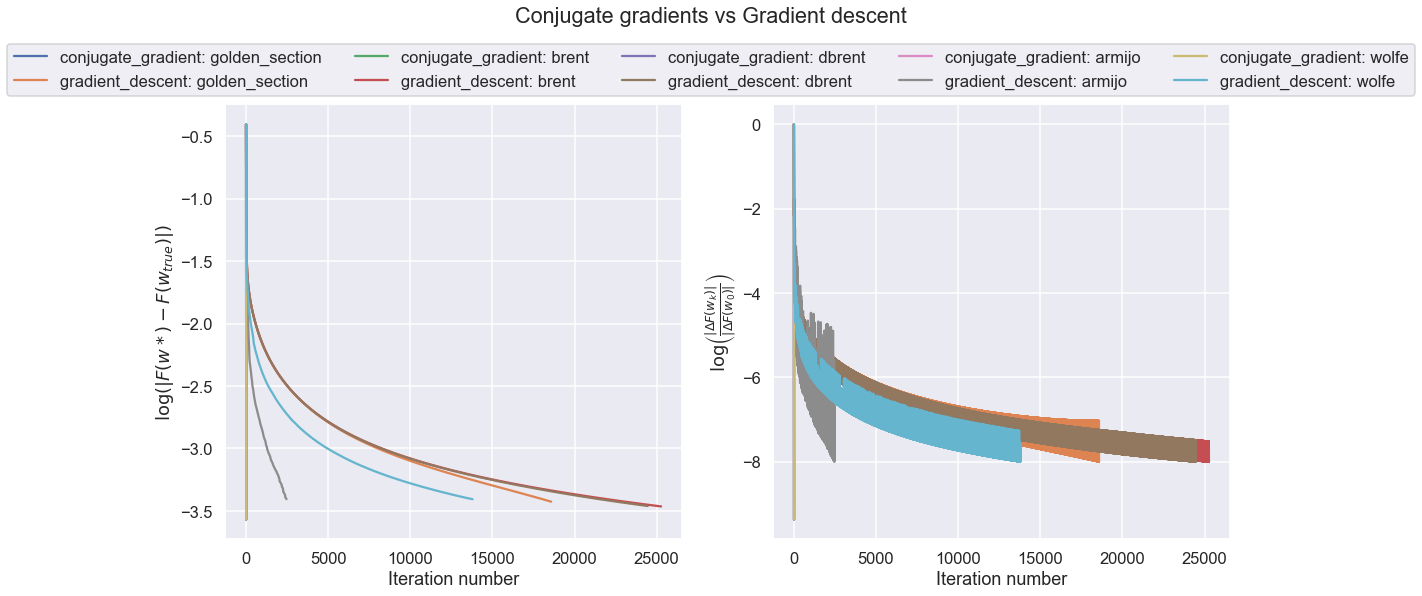

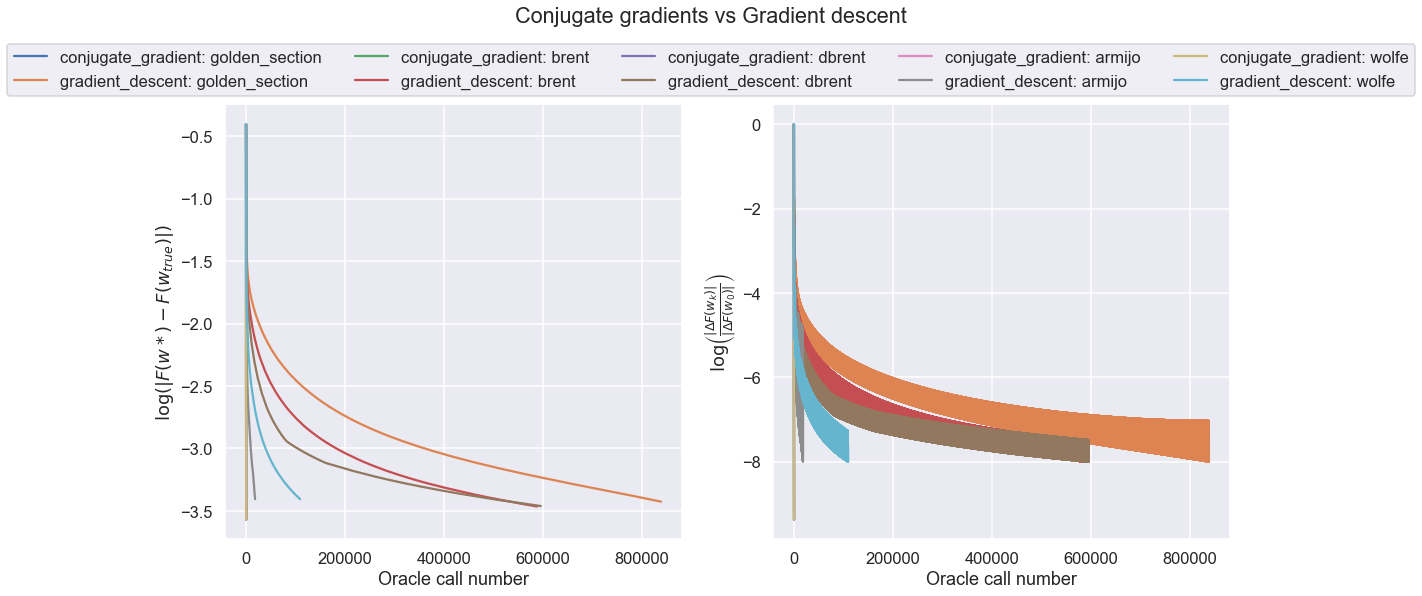

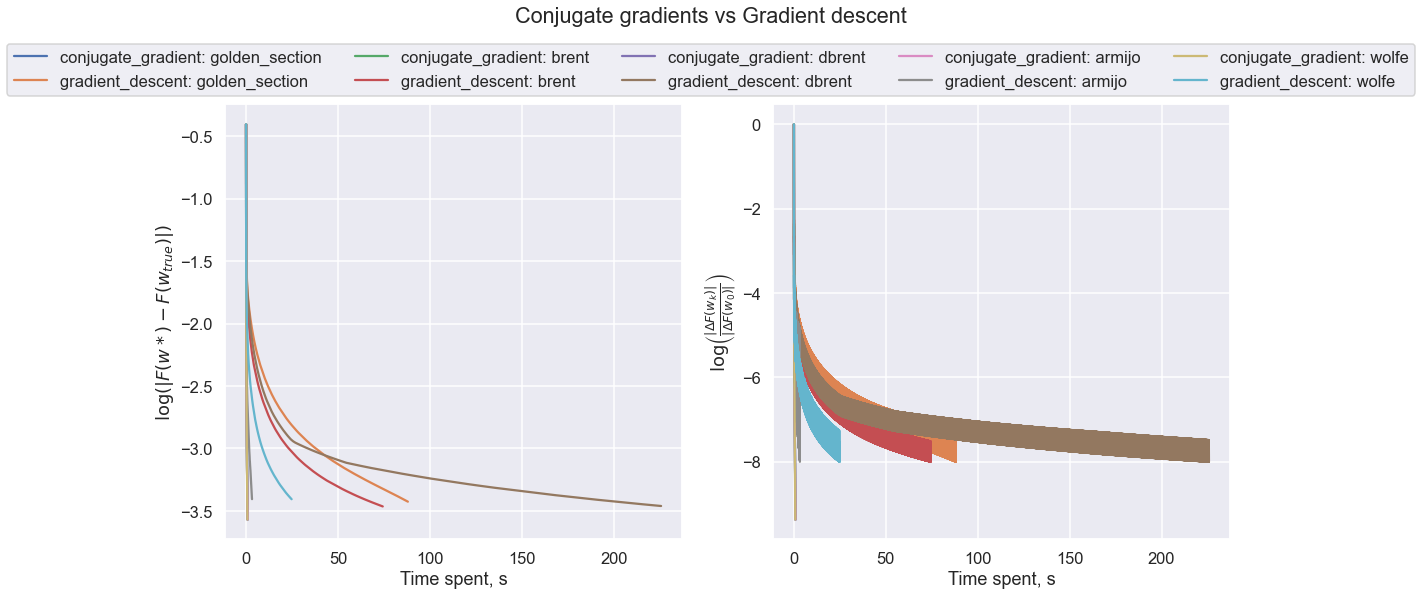

In [7]:
plot_vs_iter(data, true_ans, "conjugate_gradient", "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")
plot_vs_calls(data, true_ans, "conjugate_gradient",  "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")
plot_vs_time(data, true_ans, "conjugate_gradient",  "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")

В целом, было очевидно, что подобное сравнение показывает примерно ноль информации, кроме той, что метод сопряженных градиентов работает несравненно быстрее/выше/сильнее, чем метод градиентного спуска.

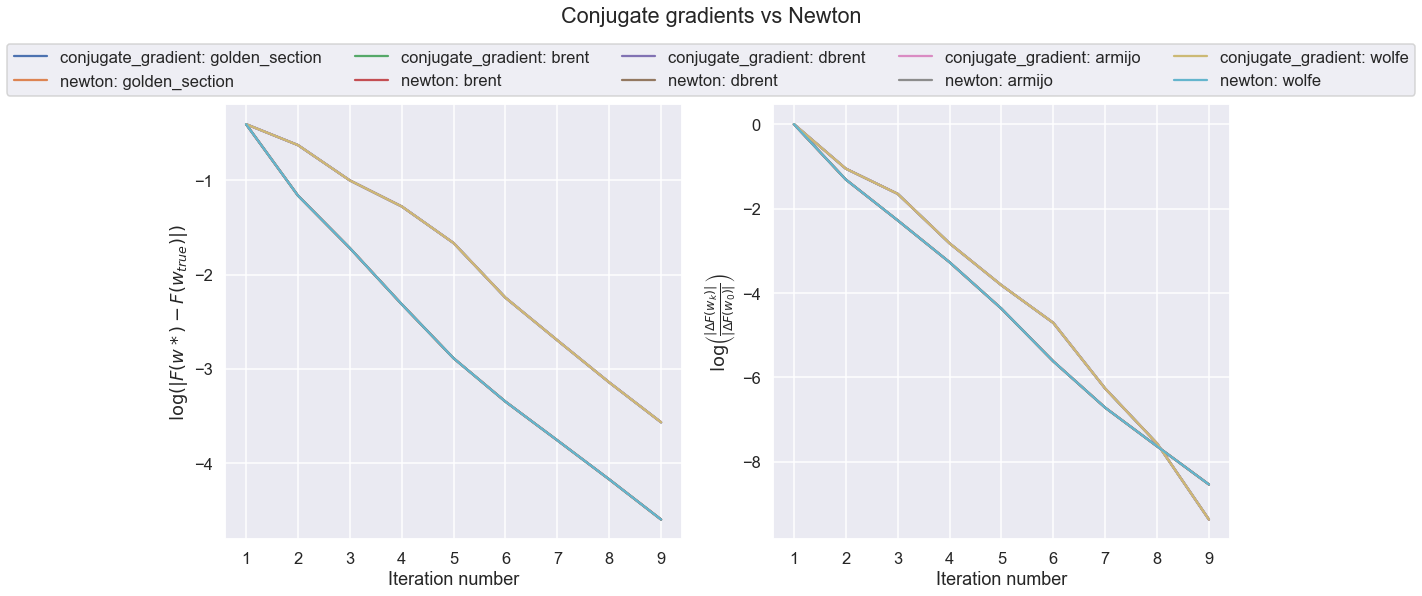

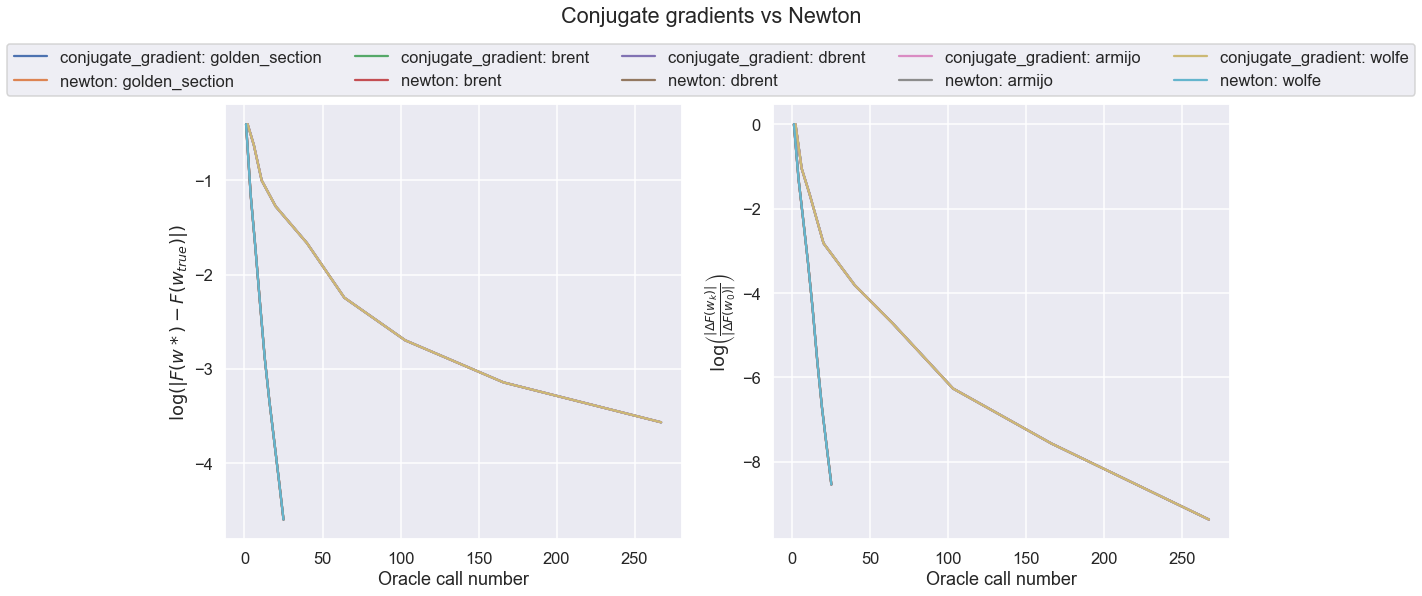

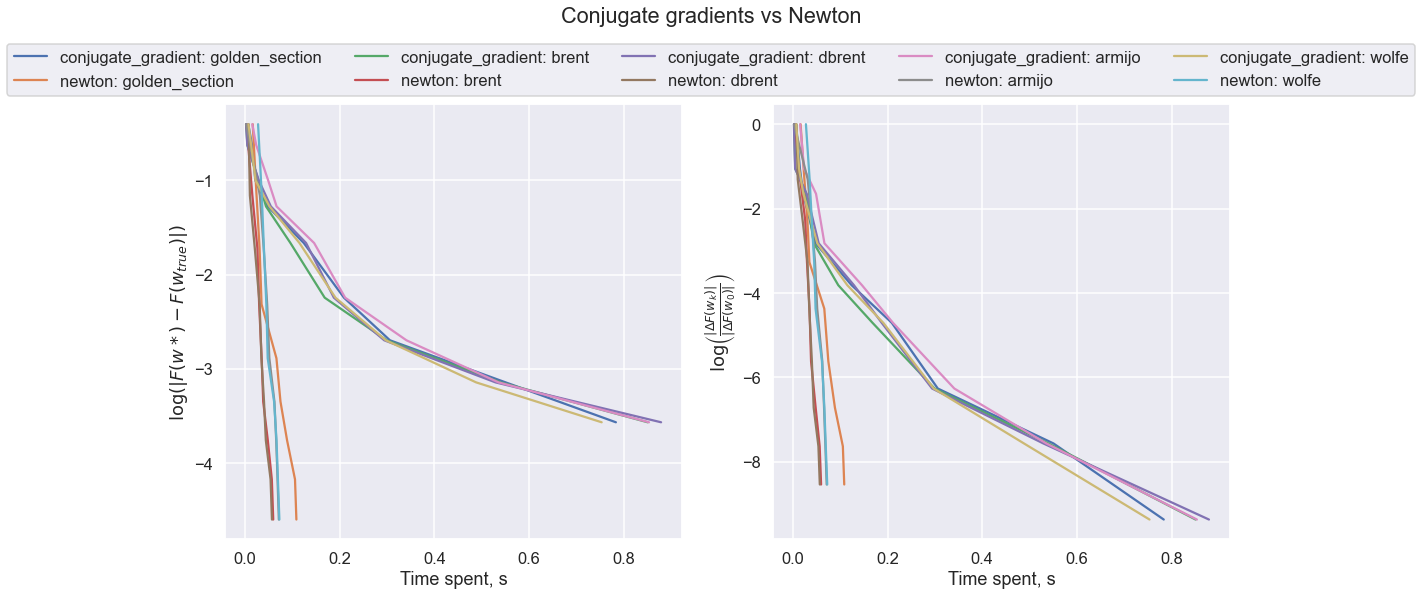

In [8]:
plot_vs_iter(data, true_ans, "conjugate_gradient", "newton", linesearch_methods, "Conjugate gradients vs Newton")
plot_vs_calls(data, true_ans, "conjugate_gradient",  "newton", linesearch_methods, "Conjugate gradients vs Newton")
plot_vs_time(data, true_ans, "conjugate_gradient",  "newton", linesearch_methods, "Conjugate gradients vs Newton")

А вот тут уже поинтереснее сравнение, так как они делают плюс/минус одинаковое кол-во итераций, но обращений к ораулу и затраченное время у метода Ньютона заметно меньшее, чем у метода сопряженных градиентов, что не удивительно, так как внутри споряженных градиентов мы итеративно пытаемся приближенно решить задачу на поиск направления.

In [9]:
bc = make_oracle("breast-cancer_scale.libsvm")
true_ans = optimize_sklearn(bc)

In [10]:
data = pd.read_csv("data/a1a_zeros.csv")

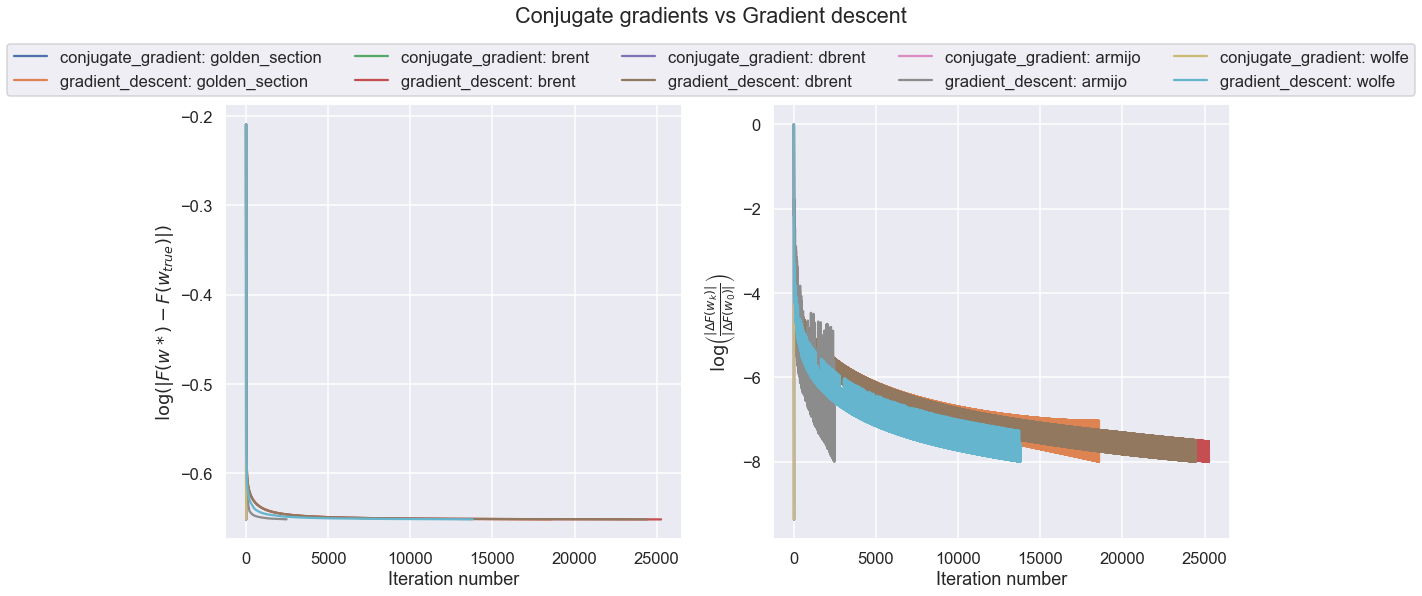

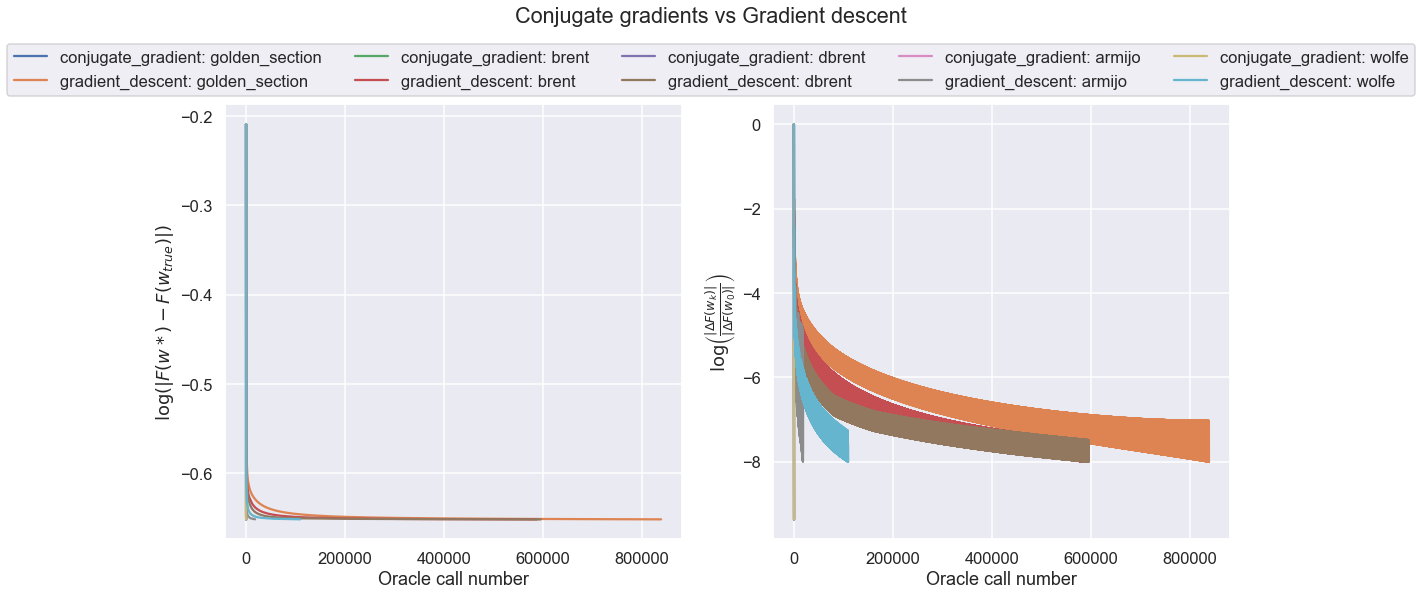

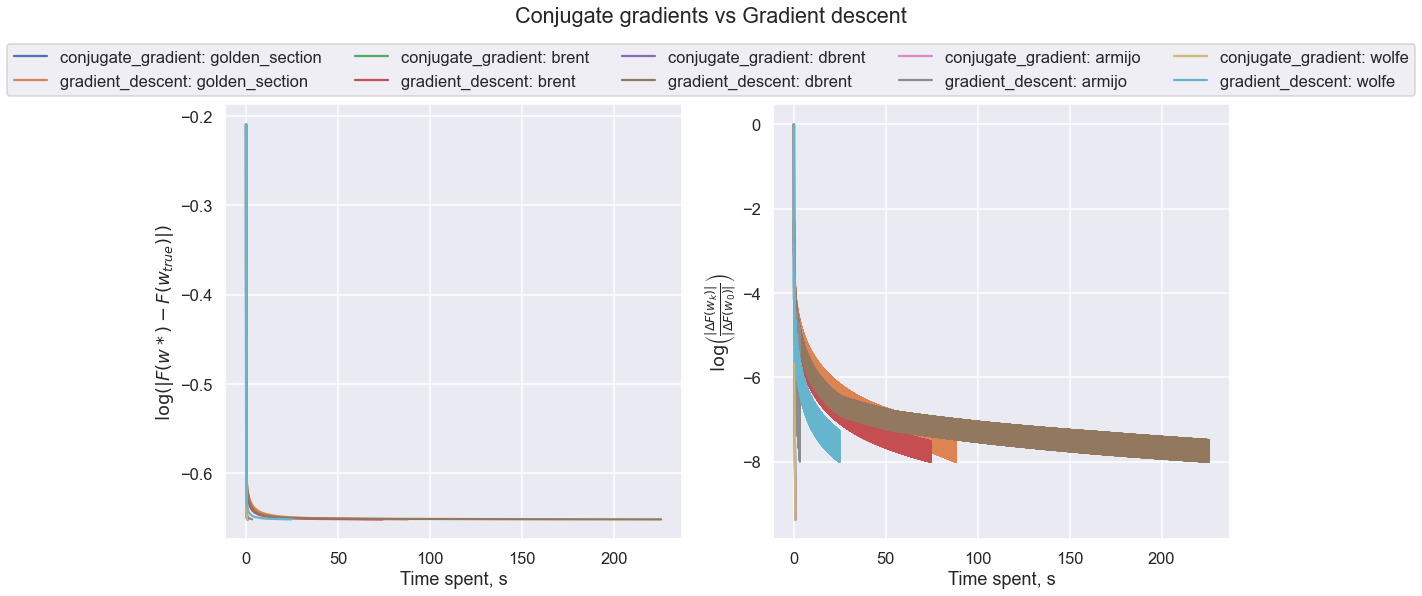

In [11]:
plot_vs_iter(data, true_ans, "conjugate_gradient", "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")
plot_vs_calls(data, true_ans, "conjugate_gradient",  "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")
plot_vs_time(data, true_ans, "conjugate_gradient",  "gradient_descent", linesearch_methods, "Conjugate gradients vs Gradient descent")

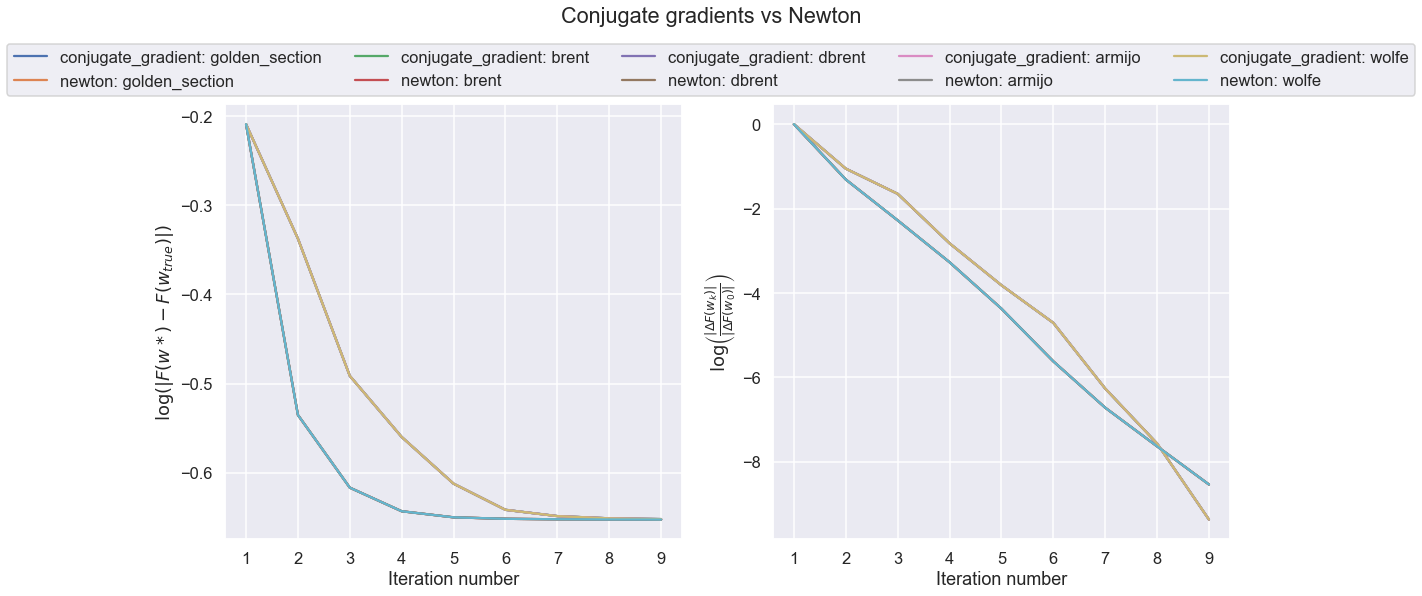

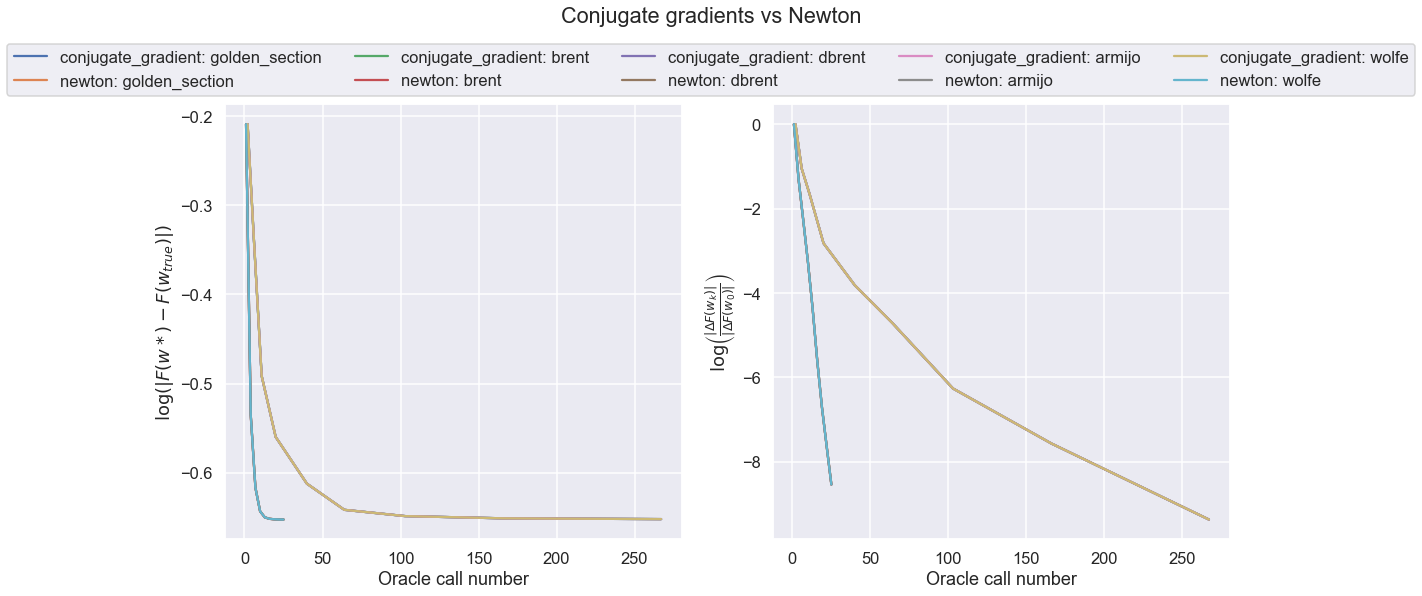

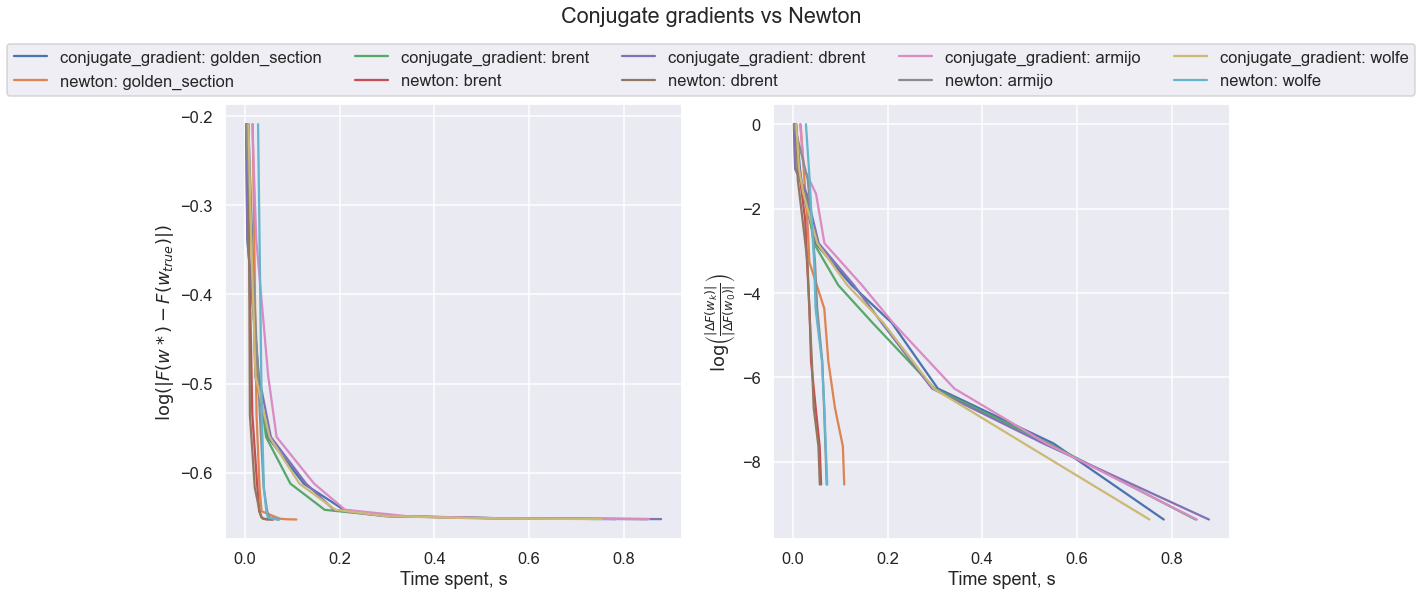

In [12]:
plot_vs_iter(data, true_ans, "conjugate_gradient", "newton", linesearch_methods, "Conjugate gradients vs Newton")
plot_vs_calls(data, true_ans, "conjugate_gradient",  "newton", linesearch_methods, "Conjugate gradients vs Newton")
plot_vs_time(data, true_ans, "conjugate_gradient",  "newton", linesearch_methods, "Conjugate gradients vs Newton")

В целом, для **breast-cancer* датасета картинка неизменилась